<a href="https://colab.research.google.com/github/LucasGarrett36/Disciplina13Unidade4/blob/main/ATV1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Amostra dos Dados:
  Combustivel  Idade  Quilometragem  Preco
0      Etanol     12          60016  22400
1    Gasolina      8         145546  57642
2      Etanol      8         194125  30151
3      Etanol     11          26959  66407
4    Gasolina      3         141602  81690

🎯 Avaliação do Modelo de Regressão Linear:
📌 Erro Quadrático Médio (MSE): 941401144.40
📌 R² (Coeficiente de Determinação): -16.29%

🚀 Comparação com Random Forest:
📌 Erro Quadrático Médio (MSE): 901097905.55
📌 R² (Coeficiente de Determinação): -11.32%


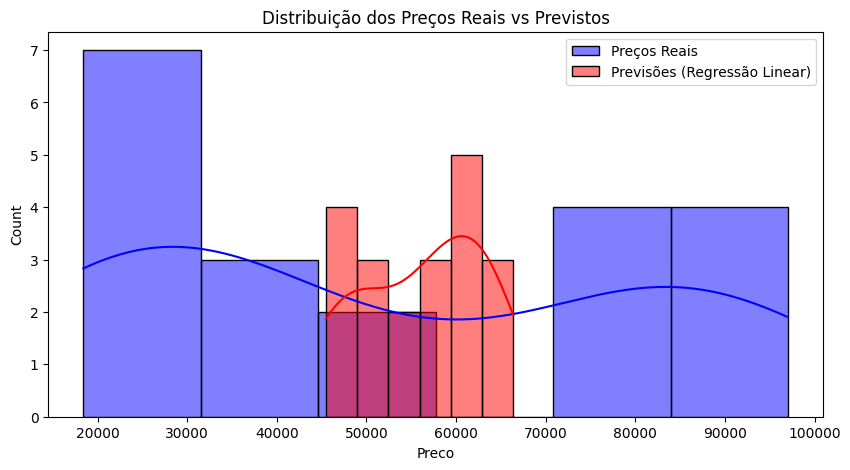

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

dados = {
    "Combustivel": np.random.choice(["Gasolina", "Diesel", "Etanol"], size=100),
    "Idade": np.random.randint(1, 15, size=100),
    "Quilometragem": np.random.randint(5000, 200000, size=100),
    "Preco": np.random.randint(15000, 100000, size=100)
}

df = pd.DataFrame(dados)

print("📌 Amostra dos Dados:")
print(df.head())

X = df.drop(columns=["Preco"])
y = df["Preco"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ["Combustivel"]
numeric_features = ["Idade", "Quilometragem"]

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)
])

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🎯 Avaliação do Modelo de Regressão Linear:")
print(f"📌 Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"📌 R² (Coeficiente de Determinação): {r2:.2%}")

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n🚀 Comparação com Random Forest:")
print(f"📌 Erro Quadrático Médio (MSE): {mse_rf:.2f}")
print(f"📌 R² (Coeficiente de Determinação): {r2_rf:.2%}")

plt.figure(figsize=(10, 5))
sns.histplot(y_test, color="blue", kde=True, label="Preços Reais", alpha=0.5)
sns.histplot(y_pred, color="red", kde=True, label="Previsões (Regressão Linear)", alpha=0.5)
plt.legend()
plt.title("Distribuição dos Preços Reais vs Previstos")
plt.show()


# Nova seção